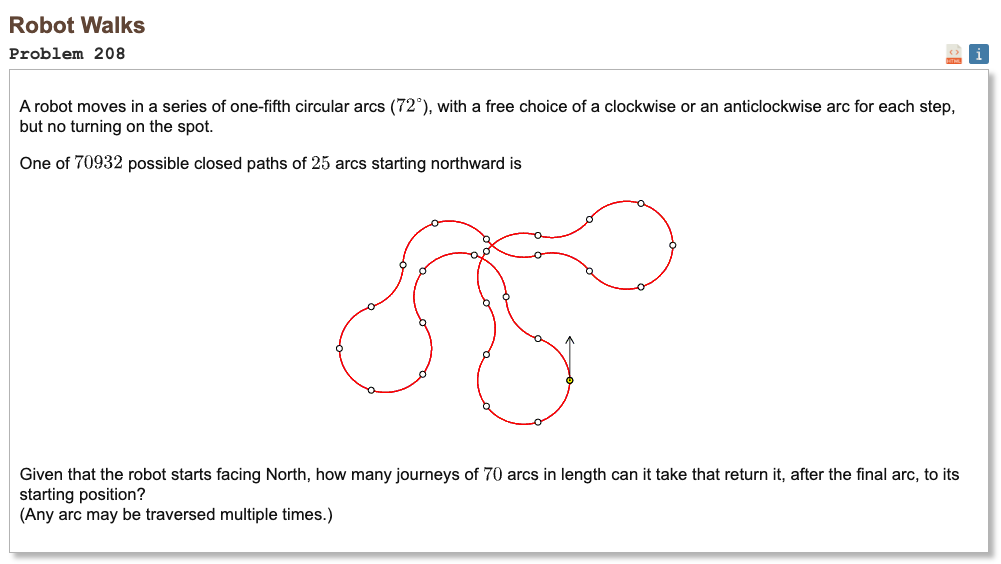

## Initial approach

* each move is a fixed 72 degree arc
* so the robot’s facing direction changes by +72 for anticlockwise or -72 for clockwise
* because the turn angle is always the same, the robot can only face 5 possible directions overall
* instead of trying every 2^70 sequence, use dynamic programming that counts how many ways reach the same state
* define a state as current position plus current facing direction
* from any state you have exactly two next states, take a left arc or a right arc, update position and direction
* keep a dictionary from state to number of ways to reach it, update it step by step for 70 steps
* at the end, add up counts of all states whose position is back at the origin, direction can be anything
* use rounding to a fine grid so positions that should be identical merge reliably

In [1]:
import functools

def solve(n=70):
    target = n // 5

    @functools.lru_cache(None)
    def dp(steps_left, arc, c0, c1, c2, c3, c4):
        if steps_left == 0:
            if arc == 0 and c0 == c1 == c2 == c3 == c4 == target:
                return 1
            return 0

        counts = [c0, c1, c2, c3, c4]
        if counts[arc] >= target:
            return 0

        counts[arc] += 1
        nc0, nc1, nc2, nc3, nc4 = counts

        left_arc = (arc + 1) % 5
        right_arc = (arc - 1) % 5

        return dp(steps_left - 1, left_arc, nc0, nc1, nc2, nc3, nc4) + dp(steps_left - 1, right_arc, nc0, nc1, nc2, nc3, nc4)

    return dp(n, 0, 0, 0, 0, 0, 0)

result = solve(70)
print("Result:", result)

Result: 331951449665644800
